# LSTM Sentiment Classifier

In this notebook, we use an LSTM to classify IMDB movie reviews by their sentiment.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/lstm_sentiment_classifier.ipynb)

#### Load dependencies

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#### Set hyperparameters

In [2]:
# output directory name:
output_dir = 'model_output/LSTM'

# training:
epochs = 10
batch_size = 128

# vector-space embedding:
n_dim = 64
n_unique_words = 10000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

# LSTM layer architecture:
n_lstm = 256
drop_lstm = 0.2

# dense layer architecture:
# n_dense = 256
# dropout = 0.2

#### Load data

In [17]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=10000)

In [18]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Get the word index from the IMDB dataset
word_index = imdb.get_word_index()

# Reverse the word index to get a dictionary mapping integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode a review; note that the indices are offset by 3 because
# 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown".
def decode_review(sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])

# Print the first review
print(decode_review(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### Preprocess data

In [19]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

#### Design neural network architecture

In [20]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm, dropout=drop_lstm))
model.add(Dense(514, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


#### Configure model

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train!

In [10]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 42s 175ms/step - loss: 0.5057 - accuracy: 0.7436 - val_loss: 0.3494 - val_accuracy: 0.8474
Epoch 2/4
  5/196 [..............................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8609

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 17s 88ms/step - loss: 0.2969 - accuracy: 0.8777 - val_loss: 0.3721 - val_accuracy: 0.8406
Epoch 3/4
196/196 [==============================] - 9s 43ms/step - loss: 0.2422 - accuracy: 0.9048 - val_loss: 0.3971 - val_accuracy: 0.8441
Epoch 4/4
196/196 [==============================] - 8s 42ms/step - loss: 0.2000 - accuracy: 0.9225 - val_loss: 0.4146 - val_accuracy: 0.8388


#### Evaluate

In [ ]:
model.load_weights(output_dir+"/weights.02.hdf5")

In [ ]:
y_hat = model.predict_proba(x_valid)

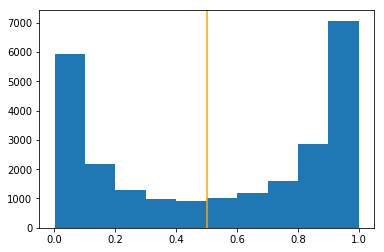

In [ ]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [ ]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'92.76'